In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('../../datafiles/Behaviour of linera models/task_b.csv')
data=data.iloc[:,1:]
data

,f1,f2,f3,y
0,-195.871045,-14843.084171,5.532140,1.0
1,-1217.183964,-4068.124621,4.416082,1.0
2,9.138451,4413.412028,0.425317,0.0
3,363.824242,15474.760647,1.094119,0.0
4,-768.812047,-7963.932192,1.870536,0.0
...,...,...,...,...
195,119.423142,-2985.720392,0.929967,0.0
196,-37.805502,13061.298176,5.421253,0.0
197,181.626647,3179.754101,3.059868,0.0
198,443.199825,-1053.252455,5.467800,0.0


In [3]:
data.corr()['y']

f1    0.067172
f2   -0.017944
f3    0.839060
y     1.000000
Name: y, dtype: float64

In [4]:
data.std()

f1      488.195035
f2    10403.417325
f3        2.926662
y         0.501255
dtype: float64

In [28]:
X=data[['f1','f2','f3']].values
Y=data['y'].values
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


[15833.66694517 47177.57251567  9522.38468265]


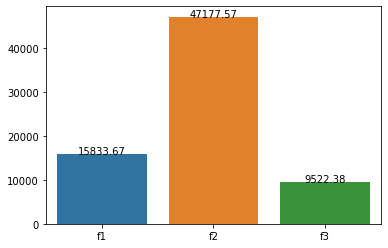

In [46]:
svc = SGDClassifier(n_jobs=-1,random_state=99).fit(X,Y)
print(svc.coef_[0])
g = sns.barplot(y=svc.coef_[0],x=data.columns[:-1])
for i in zip(svc.coef_[0],data.columns[:-1],g.patches):
    g.text(i[2].get_x()+0.4,5+i[2].get_height(),'%5.2f'%i[0], color='black', ha="center")

[ 7114.49994746  1665.22872169 11080.05778103]


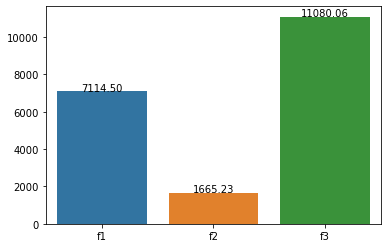

In [62]:
svc = SGDClassifier(loss='log',n_jobs=-1).fit(X,Y)
print(svc.coef_[0])
g = sns.barplot(y=svc.coef_[0],x=data.columns[:-1])
for i in zip(svc.coef_[0],data.columns[:-1],g.patches):
    g.text(i[2].get_x()+0.4,5+i[2].get_height(),'%5.2f'%i[0], color='black', ha="center")

## Observations

If the variance is low or close to zero, then a feature is approximately constant and will not improve the performance of the model. In that case, it should be removed.

Or if only a handful of observations differ from a constant value, the variance will also be very low.

This situation, where a feature has been poorly evaluated, or brings little information because it is (almost) constant can be a justification to remove a column.

In [90]:
nX=StandardScaler().fit_transform(X)

[-3.83705357  0.99298203 12.84469785]


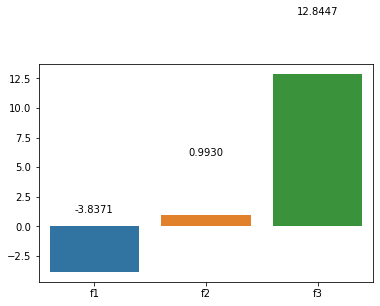

In [23]:
svc = SGDClassifier(n_jobs=-1,random_state=99).fit(nX,Y)
print(svc.coef_[0])
g = sns.barplot(y=svc.coef_[0],x=data.columns[:-1])
for i in zip(svc.coef_[0],data.columns[:-1],g.patches):
    g.text(i[2].get_x()+0.4,5+i[2].get_height(),'%5.4f'%i[0], color='black', ha="center")

[-0.11177597 -0.08835769 10.0026044 ]


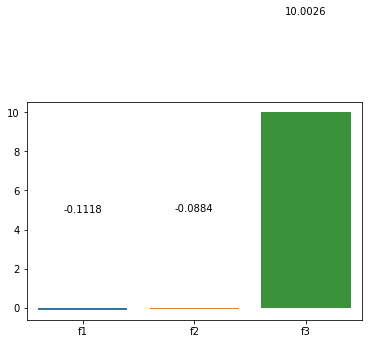

In [22]:
svc = SGDClassifier(loss='log',n_jobs=-1,random_state=99).fit(nX,Y)
print(svc.coef_[0])
g = sns.barplot(y=svc.coef_[0],x=data.columns[:-1])
for i in zip(svc.coef_[0],data.columns[:-1],g.patches):
    g.text(i[2].get_x()+0.4,5+i[2].get_height(),'%5.4f'%i[0], color='black', ha="center")

In [ ]:
If one observes, that on changing the random seed the results chnage drastically thus making it impossible to obtain an meaningfull results. So to make the results more generalized I have computed the model 10,000 times on randomstate from 0 to 9,999. So that we would be getting some reliable results by obtaining the average on the weights obtained on thw 10,000 models. 

In [96]:
coefs0 = []
for rs in range(0,10000,1):
    svc = SGDClassifier(n_jobs=-1,random_state=rs).fit(X,Y)
    coefs0.append(abs(svc.coef_[0]))

In [97]:
sum(coefs0)/10000

array([ 7691.3533082 ,  9222.60599483, 10426.56092695])

In [87]:
coefs1 = []
for rs in range(0,10000,1):
    svc = SGDClassifier(loss='log',n_jobs=-1,random_state=rs).fit(X,Y)
    coefs1.append(abs(svc.coef_[0]))

In [88]:
sum(coefs1)/10000

array([ 7658.98370787,  9236.7166181 , 10419.70935855])

In [92]:
coefs2 = []
for rs in range(0,10000,1):
    svc = SGDClassifier(loss='log',n_jobs=-1,random_state=rs).fit(nX,Y)
    coefs2.append(abs(svc.coef_[0]))

In [93]:
sum(coefs2)/10000

array([ 1.92869454,  1.45101814, 13.46517363])

In [94]:
coefs3 = []
for rs in range(0,10000,1):
    svc = SGDClassifier(n_jobs=-1,random_state=rs).fit(nX,Y)
    coefs3.append(abs(svc.coef_[0]))

In [95]:
sum(coefs3)/10000

array([ 2.47329935,  1.91476022, 17.31533136])

----
From my perspective, what I observe is that, when the data is not standardised the feature imporrtance were in order f3>f2>f1.
- Now the f3 had the most weight(imporrtance) as it is highly co-related with the independent variable(y).
- The f2 and f3 are somewhat correlateb but there was not an vast difference betw the correlation to affect their feature importances. But there was an vast difference in the Variance/Standard Diveation. As we know the features with more Variance tend to contribute more to the model. So the importance of f2 is more that f1 due to difference in SD.
----
After applying StandardScalar
- Now we have same/similar Var/SD for all features, here the feature importance comeout to br in order f3>f1>f2.
- This happens as now the feature importance majorly depende upon the correlation, since now the Variance are almost equal. So the order of the correlation(absolute value) reflects in the order in feature importance.
---- 

## Befor Standardisation

<BarContainer object of 3 artists>

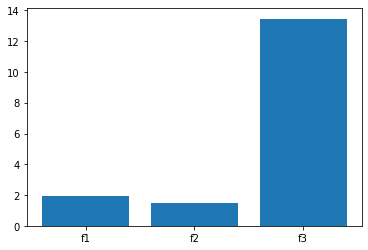

In [102]:
plt.bar(['f1','f2','f3'],sum(coefs2)/10000)

## After Standardisation

<BarContainer object of 3 artists>

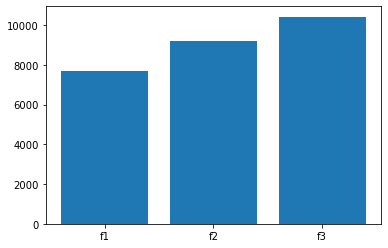

In [103]:
plt.bar(['f1','f2','f3'],sum(coefs0)/10000)